### 
### This notebook to configure the preprocessing and cleanup of the dataset
### 

In [1]:
### 
### Import libraries
### 

try:
    import numpy as np
    import pandas as pd
    import bz2
    import re
    import os
    import gc

    import matplotlib.pyplot as plt
    import seaborn as sns

    from nltk.corpus import stopwords

    import os
    import shutil
    import tarfile
    import zipfile
    import nltk
    import random
    import math
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from prettytable import PrettyTable
    from collections import defaultdict
except:
    print('Error loading required libraries. Please check requirements.txt to make sure you have the required dependencies!')
    print('Program will exit. Dependencies required to work.')

In [2]:
### 
### Connecting to Kaggle, downloading and extracting the dataset
### 

try: 
    if os.path.exists('input/test.ft.txt.bz2') and os.path.exists('input/train.ft.txt.bz2'):
        print("Dataset already downloaded!")
    else:
        os.environ['KAGGLE_USERNAME'] = "XXXXXXXXXXXXXX"
        os.environ['KAGGLE_KEY'] = "XXXXXXXXXXXXXXXXXXXXXXXXX"

        !kaggle datasets download -d bittlingmayer/amazonreviews
        shutil.move('amazonreviews.zip', 'input/amazonreviews.zip')
        with zipfile.ZipFile('input/amazonreviews.zip', 'r') as zip_ref:
            zip_ref.extractall('input/')
    os.remove('input/amazonreviews.zip')
except:
    print('Error downloading and extracting the dataset.\nPlease make sure you have all the requirements in requirements.txt\nThe program will continue...\nPlease make sure you have the dataset extracted and ready in the "input" folder.')

Dataset already downloaded!
Error downloading and extracting the dataset.
Please make sure you have all the requirements in requirements.txt
The program will continue...
Please make sure you have the dataset extracted and ready in the "input" folder.


In [3]:
### 
### Loading the dataset
### 

print('Loading the bz2 files. This may take a few minutes.')

train_file = bz2.BZ2File('input/train.ft.txt.bz2')
test_file = bz2.BZ2File('input/test.ft.txt.bz2')


train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

Loading the bz2 files. This may take a few minutes.


In [4]:
print('Training data length:' ,len(train_file_lines))
print('Testing data length:' ,len(test_file_lines))
print('The ratio is: ', len(train_file_lines)//len(test_file_lines),':1', sep = '')

Training data length: 3600000
Testing data length: 400000
The ratio is: 9:1


In [5]:
### 
### The assignment asks for a 80/20 split, therefore, we combine the two sets and split them later
### The dataset is huge, and 4,000,000 is a very huge length
### We chnage our approach and take a subset of 100,000

#dataset = train_file_lines + test_file_lines
dataset = train_file_lines[:100000]
len(dataset)

100000

In [6]:
dataset[0]
type(dataset[0])

bytes

In [7]:
### 
### Data preparation: decode and extract labels
### 

dataset = [x.decode('utf-8') for x in dataset]

In [8]:
dataset[0]

'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n'

In [9]:
dataset_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in dataset]

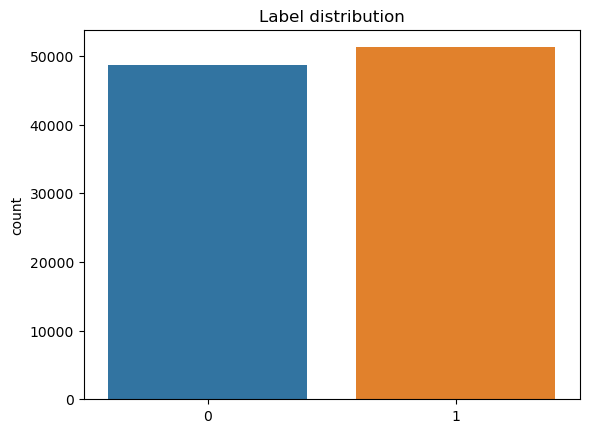

In [10]:
sns.countplot(x= dataset_labels)
plt.title('Label distribution')
plt.show()

In [11]:
### 
### Data preparation: extract taining data
### 

dataset = [x.split(' ', 1)[1][:-1] for x in dataset]

In [12]:
print(dataset[0])

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


Text(0.5, 1.0, 'Word Frequency Distribution')

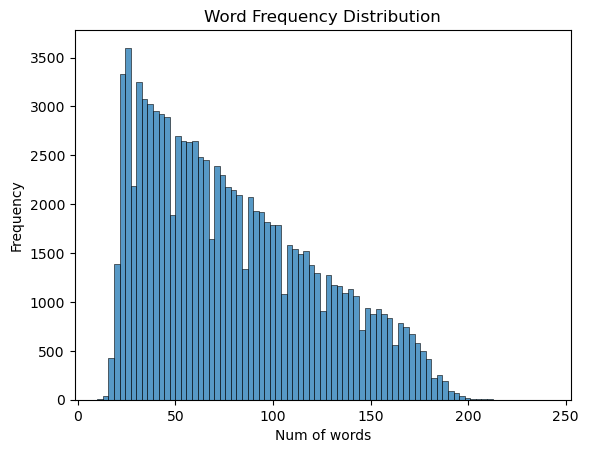

In [13]:
sentences_size = list(map(lambda x: len(x.split()), dataset))
sns.histplot(sentences_size)
plt.xlabel("Num of words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")

In [14]:
### 
### Data preparation: cleaning out URLs
### 

for i in range(len(dataset)):
    if 'www.' in dataset[i] or 'http:' in dataset[i] or 'https:' in dataset[i] or '.com' in dataset[i]:
        dataset[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", dataset[i])

In [15]:
list(filter(lambda x: '<url>' in x, dataset))[0]

"Bad Deal!!: I ordered this DVD and received a substitute I never received the DVD I ordered from Importcds (the Vendor). I contacted them and did not recieve any feedback. I can't rate a DVD I have never seen. I didn't bother to send it back because it would have cost me more that I orginally paid for it. In the future I will watch for the name of the person and/or persons I am buying from. I thought they were a good company. I understand a simple mistake but, to not get a response at all is not good businees sense. I spend hundreds of dollars a month on <url> building my DVD collection. I guess I will be more careful in the future."

In [16]:
IGNORE = 'NO'

In [17]:
### 
### Data preprocessing
### 

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
for i in range(len(dataset)):
    words = nltk.tokenize.wordpunct_tokenize(dataset[i].lower())
    if IGNORE == 'NO':
        words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    dataset[i] = words



[nltk_data] Downloading package stopwords to /home/firas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/firas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
dataset[5]

['absolut',
 'masterpiec',
 ':',
 'quit',
 'sure',
 'actual',
 'take',
 'time',
 'read',
 'play',
 'game',
 'least',
 ',',
 'heard',
 'least',
 'track',
 '.',
 'whether',
 'awar',
 ',',
 'mitsuda',
 "'",
 'music',
 'contribut',
 'greatli',
 'mood',
 'everi',
 'singl',
 'minut',
 'whole',
 'game',
 '.',
 'compos',
 '3',
 'cd',
 'quit',
 'song',
 '(',
 "'",
 'exact',
 'count',
 '),',
 'heart',
 '-',
 'render',
 'impress',
 'remark',
 ',',
 'soundtrack',
 'one',
 'assur',
 'forget',
 '.',
 'everyth',
 'everi',
 'listen',
 '--',
 'fast',
 '-',
 'pace',
 'energet',
 '(',
 'danc',
 'tokag',
 'termina',
 'home',
 '),',
 'slower',
 'haunt',
 '(',
 'dragon',
 'god',
 '),',
 'pure',
 'beauti',
 'compos',
 '(',
 'time',
 "'",
 'scar',
 '),',
 'even',
 'fantast',
 'vocal',
 '(',
 'radic',
 'dreamer',
 ').',
 'one',
 'best',
 'videogam',
 'soundtrack',
 ',',
 'sure',
 'mitsuda',
 "'",
 'best',
 'ever',
 '.',
 '^',
 '_',
 '^']

In [19]:
dataset_labels[0]

1

In [20]:
class SentimentClassifier:

    def __init__(self):
        self.vocab = set()
        self.class_probs = {}
        self.word_counts = {}
        self.class_word_counts = {}

    def fit(self, dataset, dataset_labels):
        assert len(dataset) == len(dataset_labels), "Dataset and labels not same length."
        split_idx = int(0.8 * len(dataset))
        train_data, train_labels = dataset[:split_idx], dataset_labels[:split_idx]
        test_data, test_labels = dataset[split_idx:], dataset_labels[split_idx:]
        num_examples = len(train_labels)
        classes, counts = zip(*dict.fromkeys(train_labels, 0).items())
        for c in train_labels:
            self.class_probs[c] = (train_labels.count(c) + 1) / (num_examples + len(classes))
        self.word_counts = {c: {} for c in classes}
        self.class_word_counts = {c: 0 for c in classes}
        for x, c in zip(train_data, train_labels):
            self.class_word_counts[c] += len(x)
            for word in x:
                self.vocab.add(word)
                if word not in self.word_counts[c]:
                    self.word_counts[c][word] = 0
                self.word_counts[c][word] += 1
        # print("Vocabulary:", self.vocab)
        # print("Class probabilities:", self.class_probs)
        # print("Word counts:", self.word_counts)
        # print("Class word counts:", self.class_word_counts)
    def predict(self, dataset):
        predictions = []
        for x in dataset:
            scores = {c: math.log(self.class_probs[c]) for c in self.class_probs}
            for word in x:
                if word not in self.vocab:
                    continue
                for c in self.class_probs:
                    count = self.word_counts[c].get(word, 0) + 1
                    scores[c] += math.log(count / (self.class_word_counts[c] + len(self.vocab)))
            predictions.append(max(scores, key=scores.get))
        return predictions
    def predict_single(self, text):
        words = text.strip().split()
        score = defaultdict(float)
        for c in self.class_probs:
            score[c] = math.log(self.class_probs[c])
            for word in words:
                if word in self.vocab:
                    count = self.word_counts[c].get(word, 0) + 1
                    score[c] += math.log(count / (self.class_word_counts[c] + len(self.vocab)))
            pred_label = max(score, key=score.get)
            prob_positive = math.exp(score[1]) / (math.exp(score[1]) + math.exp(score[0]))
            prob_negative = math.exp(score[0]) / (math.exp(score[1]) + math.exp(score[0]))
        return pred_label, prob_positive, prob_negative

    
    def predict_text(self, text):
        pred_label, prob_positive, prob_negative = self.predict_single(text)
        print(f"Prediction: {pred_label}\nP(Positive|S): {prob_positive:.2f}\nP(Negative|S): {prob_negative:.2f}")

In [21]:
clf = SentimentClassifier()
clf.fit(dataset, dataset_labels)
predictions = clf.predict(dataset)

In [22]:
split_idx = int(0.8 * len(dataset))
test_data, test_labels = dataset[split_idx:], dataset_labels[split_idx:]
test_predictions = clf.predict(test_data)

In [23]:
tp, tn, fp, fn = 0, 0, 0, 0
for true_label, pred_label in zip(test_labels, test_predictions):
    if true_label == 1 and pred_label == 1:
        tp += 1
    elif true_label == 0 and pred_label == 0:
        tn += 1
    elif true_label == 1 and pred_label == 0:
        fn += 1
    elif true_label == 0 and pred_label == 1:
        fp += 1

In [24]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
npv = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f_score = 2 * precision * sensitivity / (precision + sensitivity)

In [25]:
table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["True positives", tp])
table.add_row(["True negatives", tn])
table.add_row(["False positives", fp])
table.add_row(["False negatives", fn])
table.add_row(["Sensitivity (recall)", "{:.2f}".format(sensitivity)])
table.add_row(["Specificity", "{:.2f}".format(specificity)])
table.add_row(["Precision", "{:.2f}".format(precision)])
table.add_row(["Negative predictive value", "{:.2f}".format(npv)])
table.add_row(["Accuracy", "{:.2f}".format(accuracy)])
table.add_row(["F-score", "{:.2f}".format(f_score)])
print(table)

+---------------------------+-------+
|           Metric          | Value |
+---------------------------+-------+
|       True positives      |  8488 |
|       True negatives      |  8212 |
|      False positives      |  1536 |
|      False negatives      |  1764 |
|    Sensitivity (recall)   |  0.83 |
|        Specificity        |  0.84 |
|         Precision         |  0.85 |
| Negative predictive value |  0.82 |
|          Accuracy         |  0.83 |
|          F-score          |  0.84 |
+---------------------------+-------+


In [26]:
while True:
    text = input("Enter a text to classify (or N to quit): ")
    if text == 'N':
        break
    clf.predict_text(text)


Enter a text to classify (or N to quit): N
